# XOR(퍼셉트론 사용해서 해결)

## AND, OR, NAND

In [70]:
# def AND(x1, x2):
#     w1, w2, theta = 0.5, 0.5, 0.7 # theat => 세타 = 바이어스 = 절편
#     y = (x1 * w1) + (x2 * w2)
#     if y >= theta:
#         return 1
#     else:
#         return 0

# x1, x2 -> y
# 0, 0 -> 0
# 0, 1 -> 0
# 1, 0 -> 0
# 1, 1 -> 1
# print(f"{AND(0,0)=}, {AND(0, 1)=}, {AND(1,0)=}, {AND(1,1)=}")

import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1
    


In [71]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1
    


In [72]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1

In [73]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(x1, x2)
    return y   

In [74]:
print(f"AND: {AND(0,0)=}, {AND(0, 1)=}, {AND(1,0)=}, {AND(1,1)=}")
print(f"NAND: {NAND(0,0)=}, {NAND(0, 1)=}, {NAND(1,0)=}, {NAND(1,1)=}")
print(f"OR: {OR(0,0)=}, {OR(0, 1)=}, {OR(1,0)=}, {OR(1,1)=}")
print(f"XOR: {XOR(0,0)=}, {XOR(0, 1)=}, {XOR(1,0)=}, {XOR(1,1)=}")

AND: AND(0,0)=0, AND(0, 1)=0, AND(1,0)=0, AND(1,1)=1
NAND: NAND(0,0)=1, NAND(0, 1)=1, NAND(1,0)=1, NAND(1,1)=0
OR: OR(0,0)=0, OR(0, 1)=1, OR(1,0)=1, OR(1,1)=1
XOR: XOR(0,0)=0, XOR(0, 1)=0, XOR(1,0)=0, XOR(1,1)=1


# 시각적으로 확인하는 경사하강법

- 반복 횟수를 줄일수록 이득

In [75]:
from chapter0 import *
import numpy as np

In [76]:
true_w = 2
true_b = 1
N = 100

np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = 0.1 * np.random.randn(N, 1) # 적당히 작은 노이즈 추가
y = true_b + (true_w * x) + epsilon # 우리가 만든 정답지

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Generated Data - Validation'}, xlabel='x', ylabel='y'>],
       dtype=object))

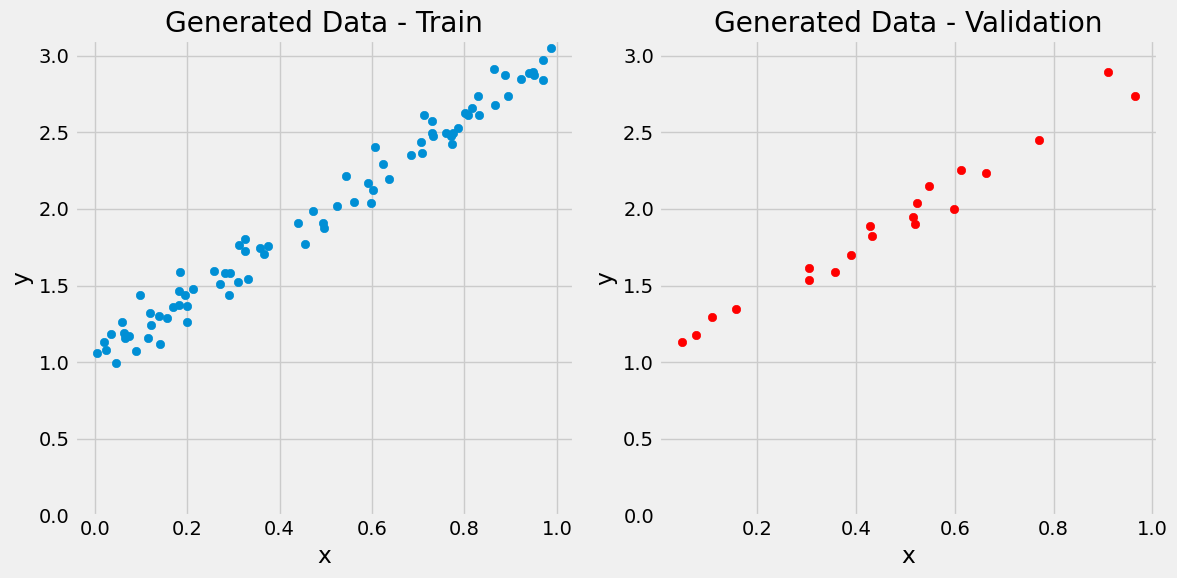

In [77]:
idx = np.arange(N)
np.random.shuffle(idx)

train_idx = idx[:int(N *0.8)]
val_idx = idx[int(N*0.8) :]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

figure1(x_train, y_train, x_val, y_val)

# 경사하강법

## Step0. 무작위 초기화
- 딥러닝의 초기화 => 반드시 무작위 값을 넣어야 함
- 머신러닝은 상한과 하한이 정해진 값이 많아서 아님.

In [78]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
print(b, w) # 초기화 된 값

[0.49671415] [-0.1382643]


## Step1. 모델 예측 계산

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

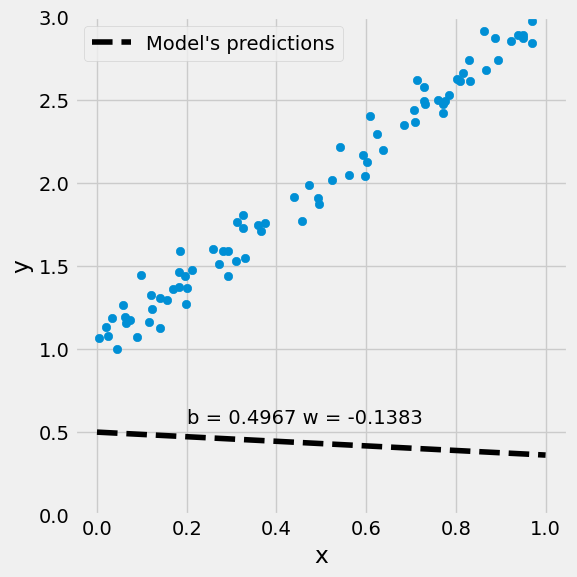

In [79]:
yhat = b + w * x_train
figure2(x_train, y_train, b, w)

## Step2. 손실 계산

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

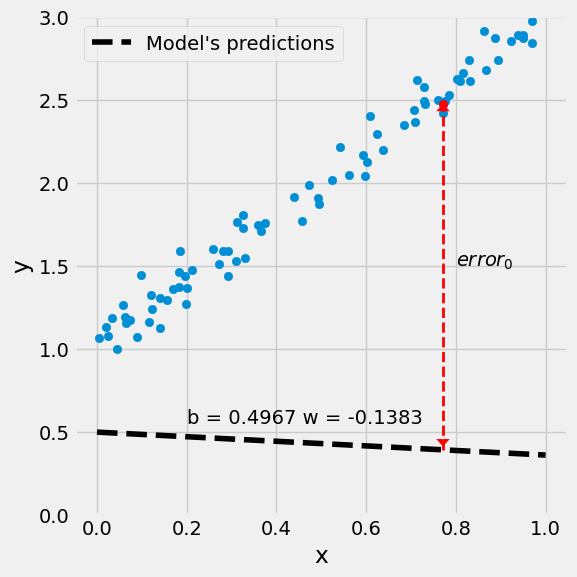

In [80]:
figure3(x_train, y_train, b, w)

In [81]:
error = yhat - y_train
loss = (error**2).mean()
print(loss)

2.7421577700550976


- 무작위로 초기화된 매개변수에 해당하는 순실값을 계산
- 손실을 어떻게 줄이나? => 기울기를 어떻게 조정하나? => b고정 w조정

In [82]:
b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_b - 3, true_b + 3, 101)
bs, ws = np.meshgrid(b_range, w_range)
print(bs.shape, ws.shape)

(101, 101) (101, 101)


In [83]:
sample_x = x_train[0]
sample_yhat = bs + ws * sample_x
sample_yhat.shape

(101, 101)

In [84]:
all_predictions = np.apply_along_axis(func1d=lambda x: bs + ws * x, axis=1, arr=x_train)
all_predictions

array([[[-3.54254069, -3.48254069, -3.42254069, ...,  2.33745931,
          2.39745931,  2.45745931],
        [-3.49626447, -3.43626447, -3.37626447, ...,  2.38373553,
          2.44373553,  2.50373553],
        [-3.44998825, -3.38998825, -3.32998825, ...,  2.43001175,
          2.49001175,  2.55001175],
        ...,
        [ 0.99252895,  1.05252895,  1.11252895, ...,  6.87252895,
          6.93252895,  6.99252895],
        [ 1.03880517,  1.09880517,  1.15880517, ...,  6.91880517,
          6.97880517,  7.03880517],
        [ 1.08508139,  1.14508139,  1.20508139, ...,  6.96508139,
          7.02508139,  7.08508139]],

       [[-2.1271167 , -2.0671167 , -2.0071167 , ...,  3.7528833 ,
          3.8128833 ,  3.8728833 ],
        [-2.1233032 , -2.0633032 , -2.0033032 , ...,  3.7566968 ,
          3.8166968 ,  3.8766968 ],
        [-2.1194897 , -2.0594897 , -1.9994897 , ...,  3.7605103 ,
          3.8205103 ,  3.8805103 ],
        ...,
        [-1.7533936 , -1.6933936 , -1.6333936 , ...,  

(80, 1, 1)
(80, 101, 101)
(101, 101)


(<Figure size 1200x600 with 2 Axes>,
 (<Axes3D: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
  <Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>))

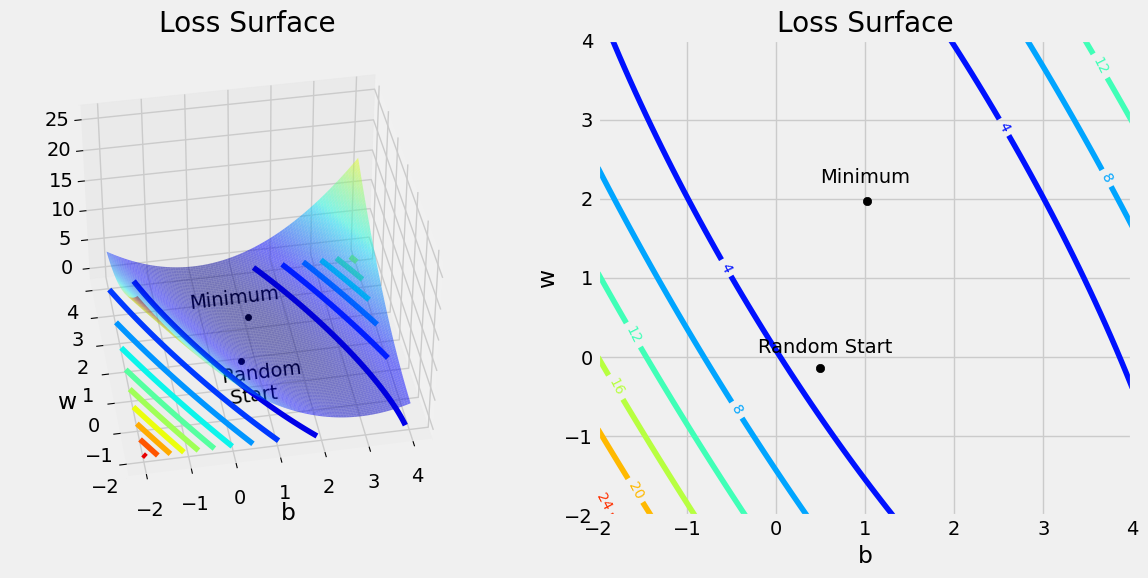

In [85]:
all_labels = y_train.reshape(-1, 1, 1)
print(all_labels.shape)

all_errors = all_predictions - all_labels
print(all_errors.shape)
all_losses = (all_errors**2).mean(axis=0)
print(all_losses.shape)
figure4(x_train, y_train, b, w, bs, ws, all_losses)

(80, 1, 1)
(80, 101, 101)
(101, 101)


(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='Loss'>],
       dtype=object))

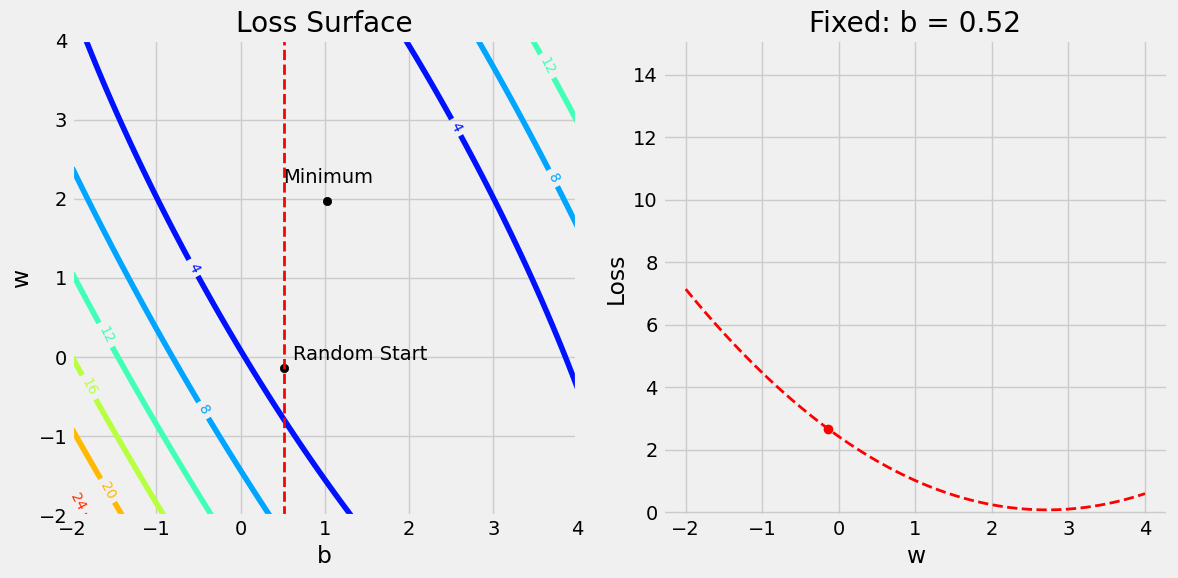

In [86]:
all_labels = y_train.reshape(-1, 1, 1)
print(all_labels.shape)

all_errors = all_predictions - all_labels
print(all_errors.shape)
all_losses = (all_errors**2).mean(axis=0)
print(all_losses.shape)
figure5(x_train, y_train, b, w, bs, ws, all_losses)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Fixed: w = -0.14'}, xlabel='b', ylabel='Loss'>],
       dtype=object))

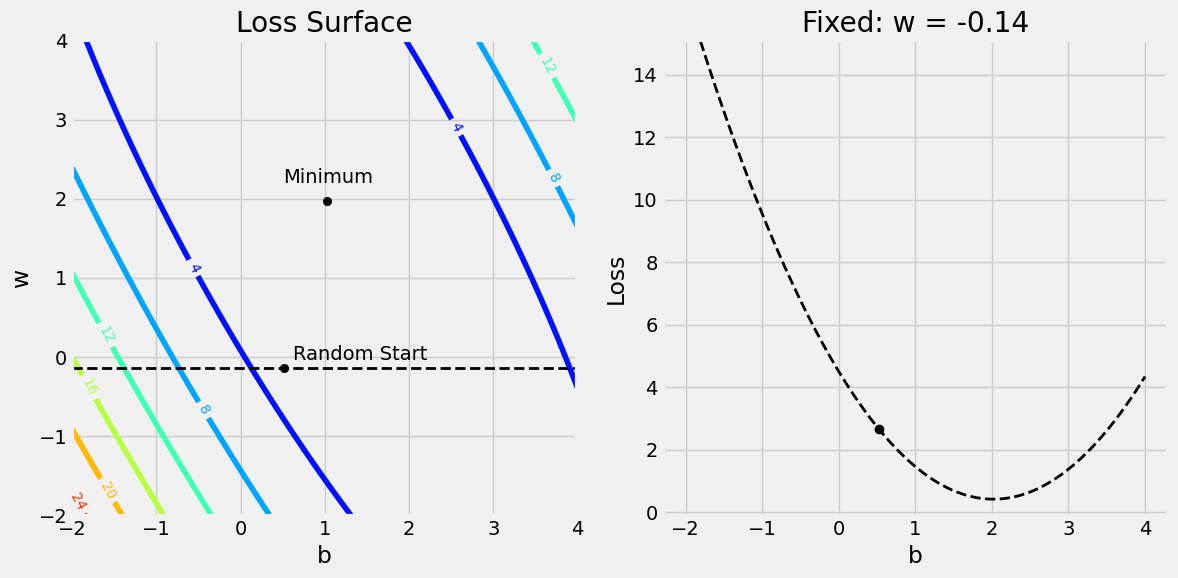

In [87]:
figure6(x_train, y_train, b, w, bs, ws, all_losses)

## Step3. 경사를 계산

In [88]:
b_grad = 2 * error.mean() # 2는 수학 공식(편미분)으로 구함.
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.14'}, xlabel='b'>],
       dtype=object))

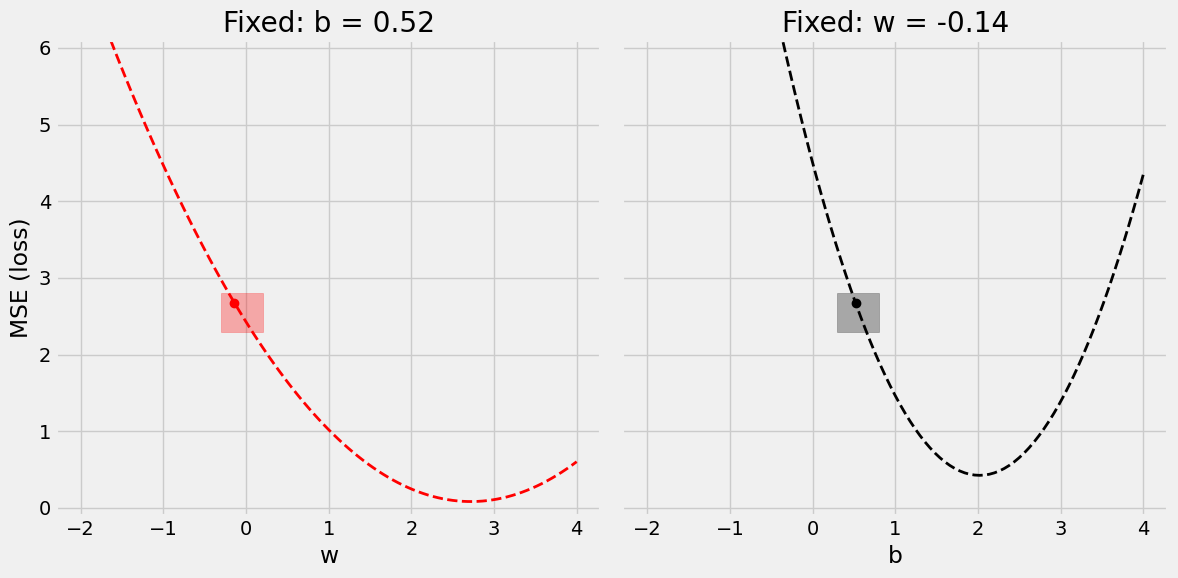

In [89]:
figure7(b, w, bs, ws, all_losses)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.14'}, xlabel='b'>],
       dtype=object))

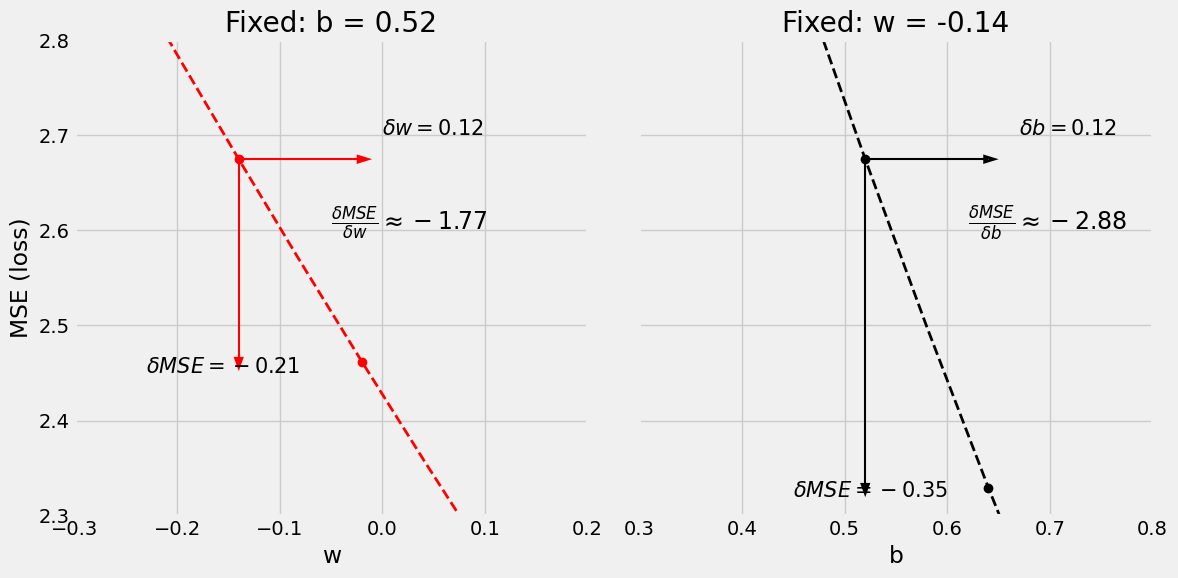

In [90]:
figure8(b, w, bs, ws, all_losses)

## Step4. 매개변수를 조정

In [91]:
lr = 0.1 # 편미분은 계수 크기를 정해주는 아이인데, 이 계수를 얼마나 크게 하는지에 따라 속도와 
print(b, w)

b = b - lr * b_grad
w = w - lr * w_grad
print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

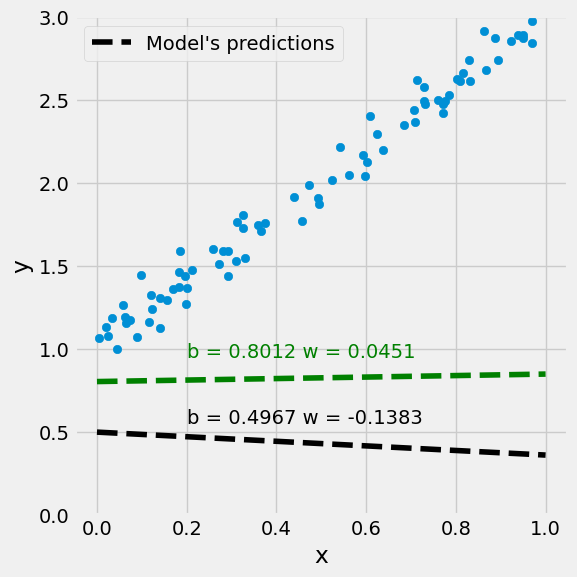

In [92]:
figure9(x_train, y_train, b, w)

# ---- 반복 -----

# 파이토치를 사용한 회귀

In [93]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn

from sklearn.linear_model import LinearRegression

In [94]:
true_w = 2
true_b = 1
N = 100

np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = 0.1 * np.random.randn(N, 1) # 적당히 작은 노이즈 추가
y = true_b + (true_w * x) + epsilon # 우리가 만든 정답지

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Generated Data - Validation'}, xlabel='x', ylabel='y'>],
       dtype=object))

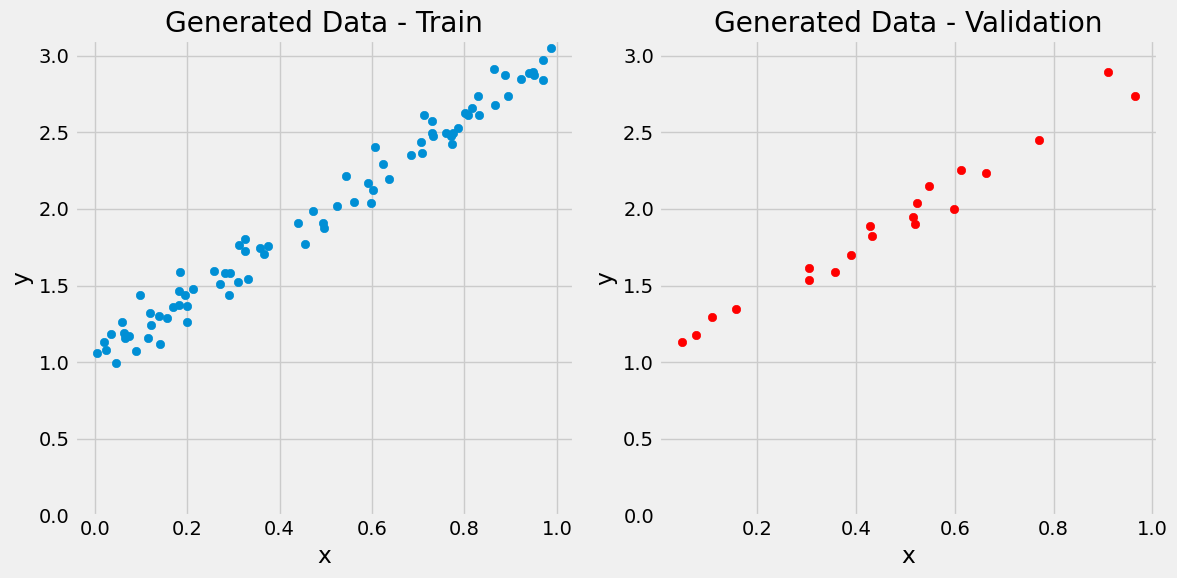

In [95]:
idx = np.arange(N)
np.random.shuffle(idx)

train_idx = idx[:int(N *0.8)]
val_idx = idx[int(N*0.8) :]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

figure1(x_train, y_train, x_val, y_val)

# numpy 사용

In [96]:
# 경사 하강법을 활용해 회기 푸는 것

# 무작위 값으로 시작
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

lr = 0.1

# 1000번 돌거야
n_epochs = 1000


for epoch in range(n_epochs):
    #1.단계: 순전파
    yhat = b + w* x_train
    # 2단계: 손실 계산
    error = yhat - y_train
    
    # MSE(오차 계산)
    loss = (error**2).mean()
    
    # 3, 4단계 역전파
    # 3단계: 기울기 계산 => 편미분을 통해서 2를 찾는데, 이것은 파일토치가 해준다.
    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()
    
    # 4단계: 업데이트 => 기울기 보정
    b = b - lr * b_grad
    w = w - lr * w_grad
    
print(b, w)

[1.02354094] [1.96896411]


# skikit-learn 사용

In [97]:
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.02354075] [1.96896447]


# Pytorch
* 텐서 (Tensor)
    - 숫자: 스칼라
    - 배열: 텐서

* 옵티마이저
    - 최적화 함수 (반드시 별도로 배워야 함)

* 모델

In [98]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [99]:
## 파이토치 사용 법

scalar = torch.tensor(3.14)
vector = torch.tensor([1, 2, 3])

matrix = torch.ones((2, 3), dtype=torch.int) ## 현업에서 int 거의 안씀 / torch는 torch 것을 쓰는 것이 가장 안전함. np 쓰지 말 것
tensor = torch.randn((2, 3, 4), dtype=torch.float)
# print(f"{scalar}, \n{vector}, \n{matrix}, \n{tensor}")

# # tensor는 반드시 shape이 안 맞으면 계산 자체가 안됨!!!!!!
# # 반드시 shape 맞출 것! .shape = .size()

# print(scalar.size(), scalar.shape) # 빈배열이 아니라, 배열 아닌 숫자(스칼라)

In [100]:
#same_matrix = matrix.view(1, 6)  # same_matrix => 바꿨는데, 원본 데이터인 matrix가 바뀜.

# same_matrix = matrix.new_tensor(matrix.view(1, 6)) # 값을 복사할 때 new_tensor를 쓰는데, 이것말고 아래것을 써라
same_matrix = matrix.view(1, 6).clone().detach() # 값을 복사하고, 기울기랑 분리해서 값만 복사해서 넣어라.

same_matrix[0, 1] = 2.0

print(matrix)
print(same_matrix)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)
tensor([[1, 2, 1, 1, 1, 1]], dtype=torch.int32)


In [101]:
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

In [ ]:
# 손대지 않을 하이퍼 파라미터는 가장 위로 옮김
# lr = 0.1

# 파일토치를 쓸 때는 가능하면 np 대신 토치용으로 바꿀 수 있는지 확인해야 함.
# 대부분 텐서 코드에 np 쓸 일이 거의 없음

torch.manual_seed(42)

# b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device) # requires_grad=True 기울기를 계산하기 위해해
# w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)


# GD(경사하강법)
# n_epochs = 1000

# for epoch in range(n_epochs):
#     yhat = b + w * x_train_tensor
#     error = yhat - y_train_tensor
#     loss = (error**2).mean()
#     loss.backward() # 편미분 .backward() # loss를 최소 맞추는 편미분
#     # 아래의 5줄 주의해야 함.
#     with torch.no_grad(): # no_grad 자동 미분을 멈춰라는 뜻. 
#         b -= lr * b.grad  # 미분 개수를 구했기 때문에 이것으로 매개변수 업데이트 => 따라서 기울기 업데이트 멈춤
#         w -= lr * w.grad
#     b.grad.zero_() # 1000번 반복해야 하기 때문에 b의 기울기를 0으로 초기화함.
#     w.grad.zero_() # 1000번 반복해야 하기 때문에 b의 기울기를 0으로 초기화함.
    
# print(b, w)

In [ ]:
# 확률 경사 하강법

# 우리가 가진 x_train, y_train은 넘파이라서 토치로 바꾸고 cpu에 보냄
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

# 손대지 않을 하이퍼 파라미터는 가장 위로 옮김
lr = 0.1

# 파일토치를 쓸 때는 가능하면 np 대신 토치용으로 바꿀 수 있는지 확인해야 함.
# 대부분 텐서 코드에 np 쓸 일이 거의 없음

torch.manual_seed(42)

model = nn.Sequential(nn.Linear(1, 1)).to(device) # 아래로 내려가는 모델이 있고 그 안에 Liner라는 레이어를 만들고 인풋 1개, 아웃풋 1개 나오게 설정 후 cpu로 보냄
optimizer = optim.SGD(model.parameters(), lr = lr)
loss_fn = nn.MSELoss(reduction="mean")

n_epochs = 1000

for epoch in range(n_epochs):
    model.train()
    yhat = model(x_train_tensor)
    loss = loss_fn(yhat, y_train_tensor)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
print(b, w)

[1.02354094] [1.96896411]
